### **Análisis Exploratorio de Datos**

- Importamos las librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Leemos el archivo.

In [2]:
df = pd.read_csv('poblacion_H_M.csv')

- Verificamos los primeros y últimos registros del dataframe

In [3]:
df.head()

,Año,Pais,Id_Pais,Poblacion_total,Poblacion_masculina,Poblacion_femenina
0,2000,Afghanistan,AFG,19542982.0,9815442.0,9727541.0
1,2000,Albania,ALB,3089027.0,1531486.0,1557540.0
2,2000,Algeria,DZA,30774621.0,15698203.0,15076418.0
3,2000,American Samoa,ASM,58230.0,29657.0,28572.0
4,2000,Andorra,AND,66097.0,34285.0,31812.0


In [4]:
df.tail()

,Año,Pais,Id_Pais,Poblacion_total,Poblacion_masculina,Poblacion_femenina
4552,2020,Virgin Islands (U.S.),VIR,106290.0,49866.0,56425.0
4553,2020,West Bank and Gaza,PSE,4803269.0,2394860.0,2408409.0
4554,2020,"Yemen, Rep.",YEM,32284046.0,16320979.0,15963067.0
4555,2020,Zambia,ZMB,18927715.0,9338613.0,9589102.0
4556,2020,Zimbabwe,ZWE,15669666.0,7385220.0,8284447.0


- Analizamos la estructura

In [5]:
df.shape

(4557, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557 entries, 0 to 4556
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  4557 non-null   int64  
 1   Pais                 4557 non-null   object 
 2   Id_Pais              4557 non-null   object 
 3   Poblacion_total      4557 non-null   float64
 4   Poblacion_masculina  4557 non-null   float64
 5   Poblacion_femenina   4557 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 213.7+ KB


- Verificamos la existencia de datos nulos.

In [7]:
df.isnull().sum()

Año                    0
Pais                   0
Id_Pais                0
Poblacion_total        0
Poblacion_masculina    0
Poblacion_femenina     0
dtype: int64

- Realizamos estadísticas descriptivas a las columnas numéricas

In [8]:
df.describe()

,Año,Poblacion_total,Poblacion_masculina,Poblacion_femenina
count,4557.000000,4.557000e+03,4.557000e+03,4.557000e+03
mean,2010.000000,3.205234e+07,1.612364e+07,1.592870e+07
std,6.055965,1.281822e+08,6.570924e+07,6.248632e+07
min,2000.000000,9.609000e+03,4.769000e+03,4.822000e+03
25%,2005.000000,6.993930e+05,3.673820e+05,3.298730e+05
50%,2010.000000,5.612253e+06,2.845175e+06,2.785879e+06
75%,2015.000000,2.036749e+07,1.009454e+07,1.024174e+07
max,2020.000000,1.411100e+09,7.209974e+08,6.901718e+08


- Filtramos un top 10 de los paises con mayor población

In [9]:
año = 2020
top_countries_año = df[df['Año'] == año].sort_values(by=['Poblacion_femenina', 'Poblacion_masculina', 'Poblacion_total'], ascending=False)

top_countries = top_countries_año.head(10)
top_countries[['Pais', 'Poblacion_femenina', 'Poblacion_masculina', 'Poblacion_total']]

,Pais,Poblacion_femenina,Poblacion_masculina,Poblacion_total
4381,China,690171848.0,720928153.0,1.411100e+09
4429,India,675389679.0,720997448.0,1.396387e+09
4546,United States,167203010.0,164308503.0,3.315115e+08
4430,Indonesia,134930389.0,136927582.0,2.718580e+08
4489,Pakistan,112381099.0,114815641.0,2.271967e+08
4366,Brazil,108417015.0,104779288.0,2.131963e+08
4484,Nigeria,103084231.0,105243174.0,2.083274e+08
4355,Bangladesh,84357236.0,83063714.0,1.674210e+08
4501,Russian Federation,77147284.0,66925854.0,1.440731e+08
4438,Japan,64885399.0,61375600.0,1.262610e+08


### **Visualizaciones**

- Visualizamos por medio de gráficos de barras las distribución de la población en los países con mayor cantidad, en varios años seleccionados.

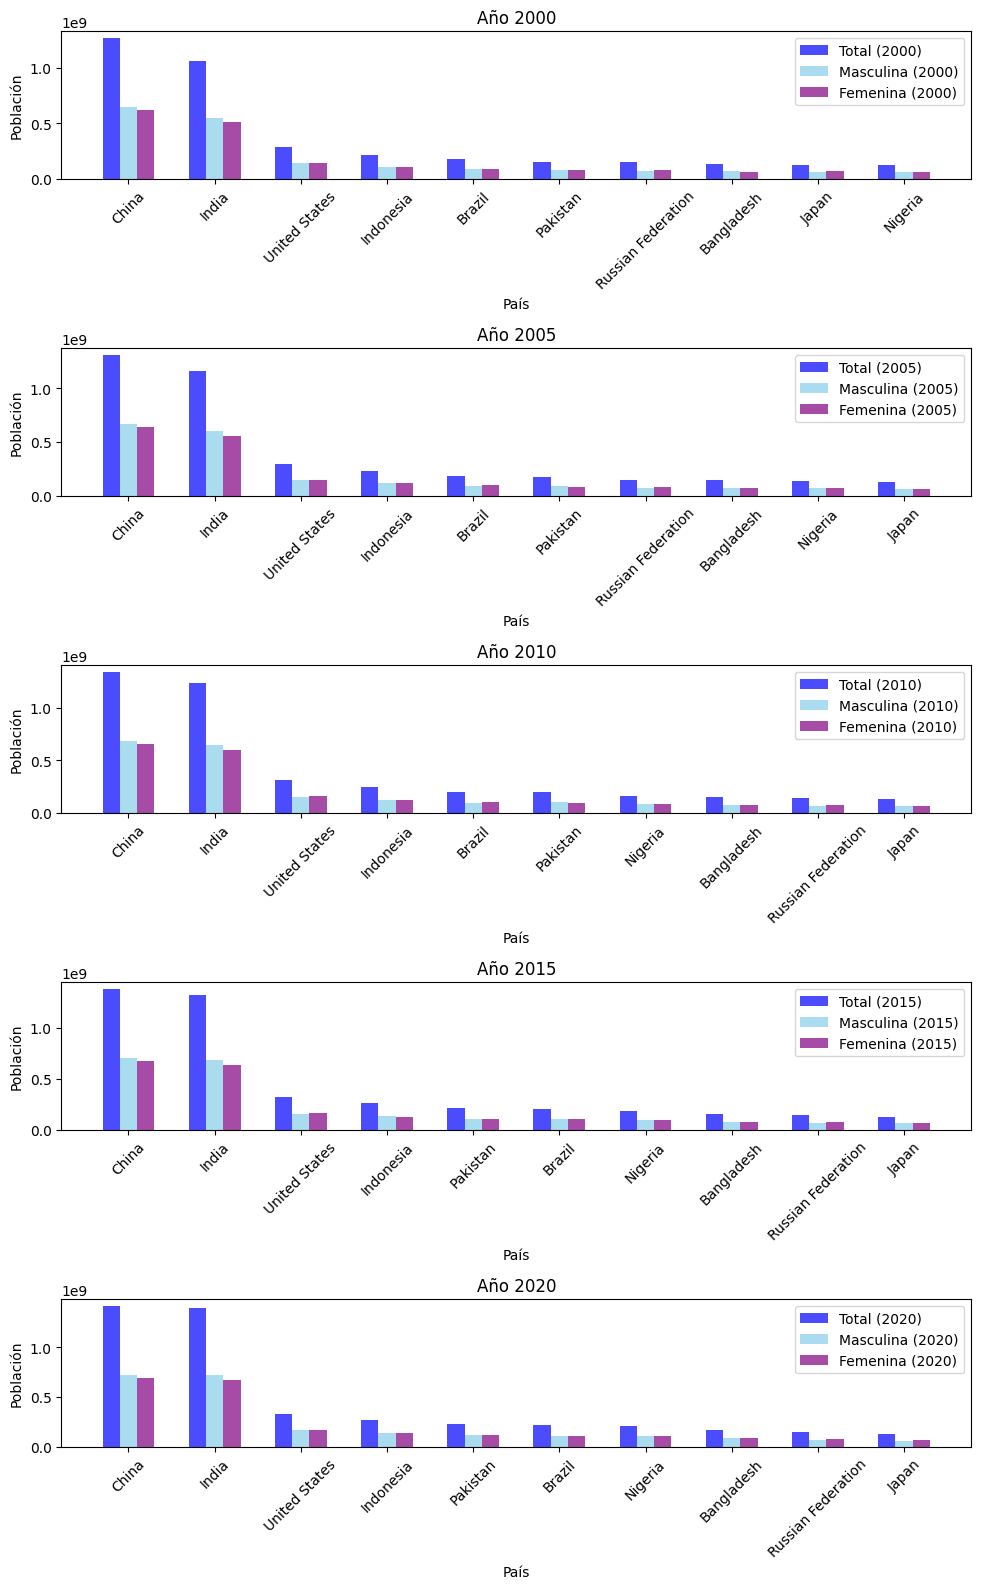

In [10]:
años_interes = [2000, 2005, 2010, 2015, 2020]

fig, axes = plt.subplots(nrows=len(años_interes), ncols=1, figsize=(10, 16))
y_range = (0, 1.6e9)

for i, año in enumerate(años_interes):
    df_año = df[df['Año'] == año]

    top_10_poblacion = df_año.sort_values(by='Poblacion_total', ascending=False).head(10)

    index = range(len(top_10_poblacion))

    bar_width = 0.2
    axes[i].bar(index, top_10_poblacion['Poblacion_total'], bar_width, label=f'Total ({año})', color='Blue', alpha=0.7)
    axes[i].bar([x + bar_width for x in index], top_10_poblacion['Poblacion_masculina'], bar_width, label=f'Masculina ({año})', color='Skyblue', alpha=0.7)
    axes[i].bar([x + 2*bar_width for x in index], top_10_poblacion['Poblacion_femenina'], bar_width, label=f'Femenina ({año})', color='purple', alpha=0.7)

    axes[i].set_xlabel('País')
    axes[i].set_ylabel('Población')
    axes[i].set_title(f'Año {año}')
    axes[i].set_xticks([x + bar_width for x in index])
    axes[i].set_xticklabels(top_10_poblacion['Pais'], rotation=45)
    axes[i].legend()

plt.tight_layout()

plt.show()

### **Conslusiones**

En este análisis de datos, hemos explorado cómo ha cambiado la población total en diferentes países a lo largo de los años, prestando especial atención a las diferencias de género. Algunas de las conclusiones clave son las siguientes:

- Tendencias Temporales: Hemos observado cómo la población total en los países seleccionados ha evolucionado a lo largo de los años, destacando  algunos años de interés, como 2000, 2005, 2010, 2015 y 2020.

- Distribución de Género: Hemos analizado cómo se distribuye la población por género en cada país y cómo ha cambiado con el tiempo. Esto nos ha permitido identificar países en los que la población femenina o masculina es dominante.

- Top 10 Países: Hemos identificado los 10 países principales en términos de población total en los años de interés, destacando aquellos que tienen una población significativamente grande y equitativa entre hombres y mujeres.